<a href="https://colab.research.google.com/github/Reachraksh/Laptop-Analysis/blob/main/Laptop_Analysiss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/content/laptop_data.csv")

In [5]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("-", "_")

In [6]:
df["Price"] = pd.to_numeric(df["Price"].astype(str).str.replace(",", ""), errors="coerce")

In [7]:
df["Weight"] = df["Weight"].astype(str).str.lower().str.replace("kgs", "kg").str.replace("kg", "").astype(float)

In [8]:
num_unique_companies = df["Company"].nunique()
company_model_counts = df["Company"].value_counts()
top_company = company_model_counts.idxmax()
top_company_count = company_model_counts.max()

print(f"Number of unique companies: {num_unique_companies}")
print(f"Company with most models: {top_company} ({top_company_count} models)")

Number of unique companies: 19
Company with most models: Dell (297 models)


/tmp/ipython-input-457885585.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Company", order=company_model_counts.index, palette="viridis")


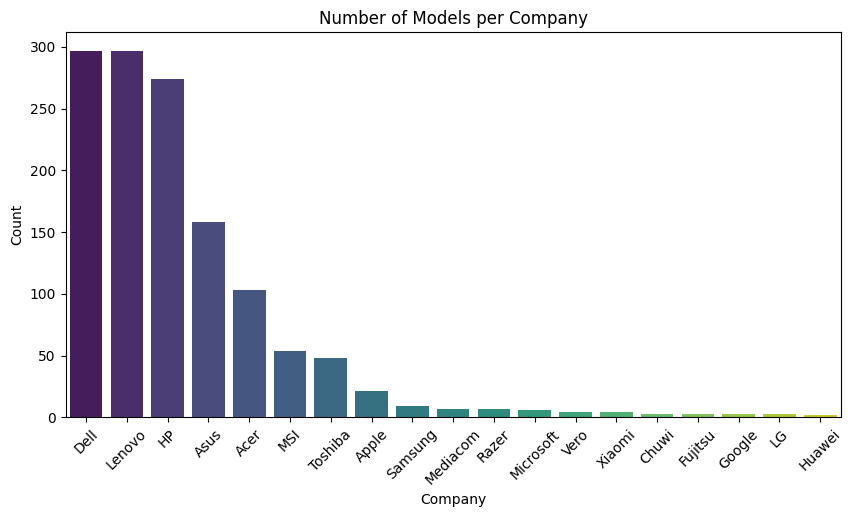

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Company", order=company_model_counts.index, palette="viridis")
plt.xticks(rotation=45)
plt.title("Number of Models per Company")
plt.xlabel("Company")
plt.ylabel("Count")
plt.show()

In [16]:
# Average price overall & by company
# =====================
avg_price_overall = df["Price"].mean()
print(f"Average price of laptops: ₹{avg_price_overall:.2f}")

avg_price_by_company = df.groupby("Company")["Price"].mean().sort_values(ascending=False)
print("\nAverage price by company:\n", avg_price_by_company)


Average price of laptops: ₹59870.04

Average price by company:
 Company
Razer        178282.491429
LG           111834.720000
MSI           92116.226133
Google        89386.080000
Microsoft     85903.788000
Apple         83340.499886
Huawei        75870.720000
Samsung       75308.320000
Toshiba       67549.050000
Dell          63193.755782
Xiaomi        60390.882000
Asus          58830.143878
Lenovo        57882.563200
HP            56891.044222
Fujitsu       38841.120000
Acer          33394.615969
Chuwi         16745.726400
Mediacom      15717.600000
Vero          11584.404000
Name: Price, dtype: float64


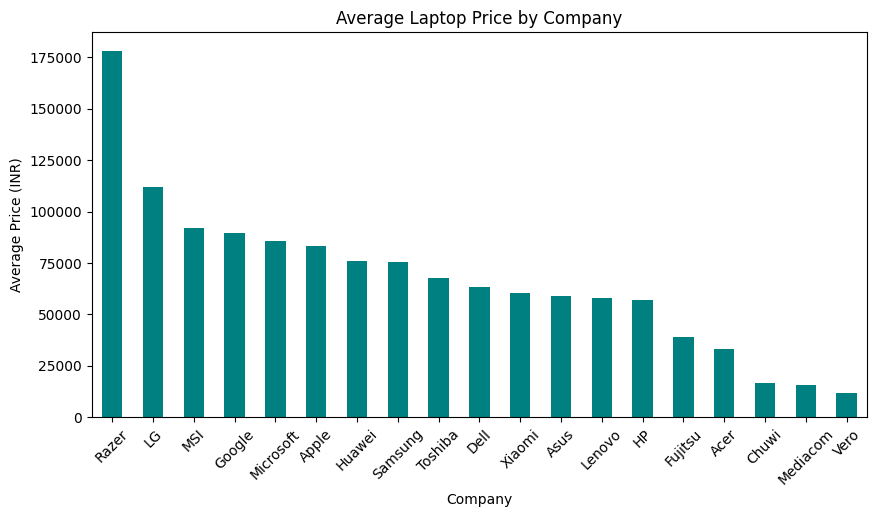

In [17]:
# Bar plot of average price per company
plt.figure(figsize=(10,5))
avg_price_by_company.plot(kind="bar", color="teal")
plt.ylabel("Average Price (INR)")
plt.title("Average Laptop Price by Company")
plt.xticks(rotation=45)
plt.show()

Most common laptop type: Notebook
Average price of Notebook: ₹41669.15


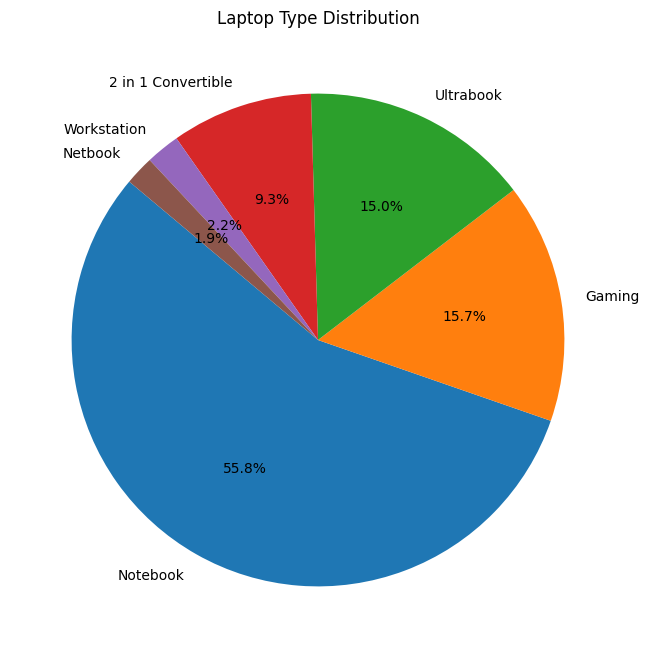

In [18]:
# Most common laptop type & its average price
# =====================
most_common_type = df["TypeName"].mode()[0]
avg_price_common_type = df[df["TypeName"] == most_common_type]["Price"].mean()

print(f"Most common laptop type: {most_common_type}")
print(f"Average price of {most_common_type}: ₹{avg_price_common_type:.2f}")

# Pie chart for laptop types
type_counts = df["TypeName"].value_counts()
plt.figure(figsize=(8,8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Laptop Type Distribution")
plt.show()


Screen size distribution:
 Inches
10.1      4
11.3      1
11.6     33
12.0      6
12.3      5
12.5     39
13.0      2
13.3    164
13.5      6
13.9      6
14.0    197
14.1      1
15.0      4
15.4      4
15.6    665
17.0      1
17.3    164
18.4      1
Name: count, dtype: int64
Most popular screen size: 15.6"


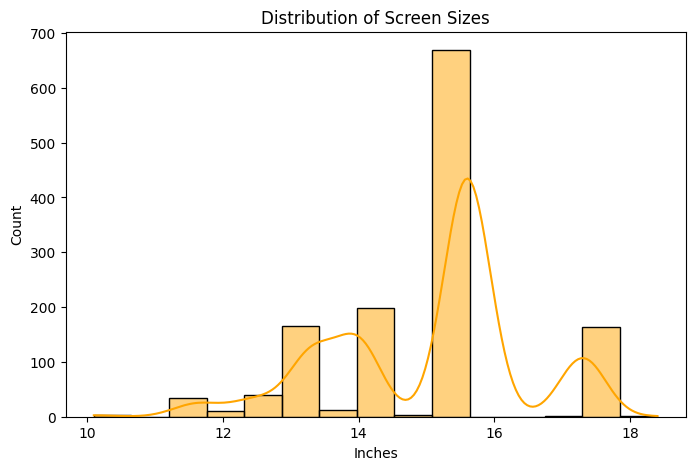

In [19]:
# Distribution of screen sizes & most popular
# =====================
inches_distribution = df["Inches"].value_counts().sort_index()
most_popular_inch = inches_distribution.idxmax()

print("Screen size distribution:\n", inches_distribution)
print(f"Most popular screen size: {most_popular_inch}\"")

# Histogram for screen sizes
plt.figure(figsize=(8,5))
sns.histplot(df["Inches"], bins=15, kde=True, color="orange")
plt.title("Distribution of Screen Sizes")
plt.xlabel("Inches")
plt.ylabel("Count")
plt.show()


In [20]:
# Min, max, avg weight & companies
# =====================
min_weight = df["Weight"].min()
max_weight = df["Weight"].max()
avg_weight = df["Weight"].mean()

company_heaviest = df.loc[df["Weight"].idxmax(), "Company"]
company_lightest = df.loc[df["Weight"].idxmin(), "Company"]

print(f"Minimum weight: {min_weight} kg ({company_lightest})")
print(f"Maximum weight: {max_weight} kg ({company_heaviest})")
print(f"Average weight: {avg_weight:.2f} kg")

Minimum weight: 0.69 kg (Lenovo)
Maximum weight: 4.7 kg (Asus)
Average weight: 2.04 kg


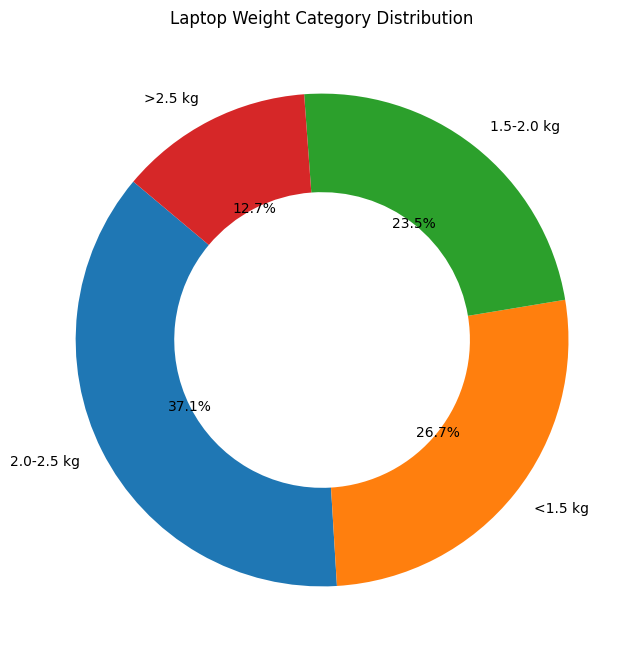

In [21]:
# Donut chart for weight categories
weight_bins = [0, 1.5, 2.0, 2.5, 3.5]
labels = ["<1.5 kg", "1.5-2.0 kg", "2.0-2.5 kg", ">2.5 kg"]
df["Weight_Category"] = pd.cut(df["Weight"], bins=weight_bins, labels=labels)

weight_counts = df["Weight_Category"].value_counts()
plt.figure(figsize=(8,8))
plt.pie(weight_counts, labels=weight_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4))
plt.title("Laptop Weight Category Distribution")
plt.show()

Average Price by OS:
 OpSys
macOS           93220.327385
Windows 7       89864.783040
Windows 10 S    68543.654400
Mac OS X        67285.780200
Windows 10      62238.471367
Linux           32877.429445
No OS           31327.219200
Chrome OS       29495.018667
Android         23123.520000
Name: Price, dtype: float64


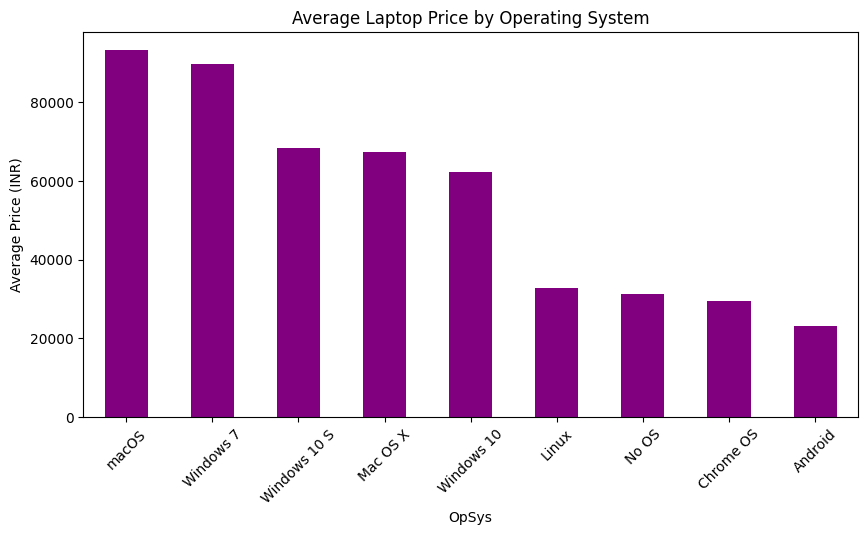

In [22]:
# 1. Average price by Operating System
# =====================================
avg_price_os = df.groupby("OpSys")["Price"].mean().sort_values(ascending=False)
print("Average Price by OS:\n", avg_price_os)

plt.figure(figsize=(10,5))
avg_price_os.plot(kind="bar", color="purple")
plt.title("Average Laptop Price by Operating System")
plt.ylabel("Average Price (INR)")
plt.xticks(rotation=45)
plt.show()

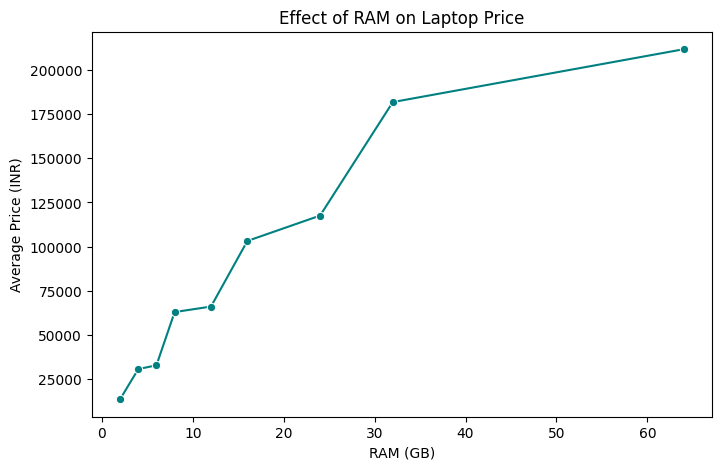

In [24]:
# Standardize column names
df.columns = df.columns.str.strip().str.title()

# Clean RAM column
df["Ram"] = df["Ram"].astype(str).str.replace("GB", "").astype(int)

# Group and analyze
avg_price_ram = df.groupby("Ram")["Price"].mean()

plt.figure(figsize=(8,5))
sns.lineplot(x=avg_price_ram.index, y=avg_price_ram.values, marker="o", color="teal")
plt.title("Effect of RAM on Laptop Price")
plt.xlabel("RAM (GB)")
plt.ylabel("Average Price (INR)")
plt.show()


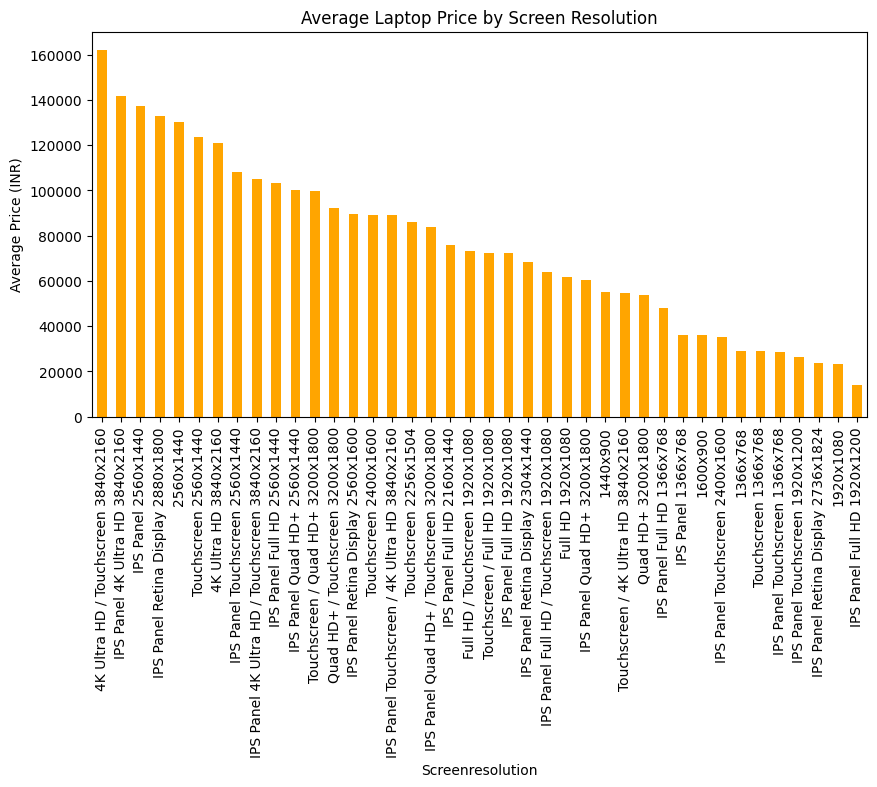

In [26]:
# Standardize column names
df.columns = df.columns.str.strip().str.replace(" ", "_").str.title()

# Now you can safely use ScreenResolution
avg_price_res = df.groupby("Screenresolution")["Price"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
avg_price_res.plot(kind="bar", color="orange")
plt.title("Average Laptop Price by Screen Resolution")
plt.ylabel("Average Price (INR)")
plt.xticks(rotation=90)
plt.show()


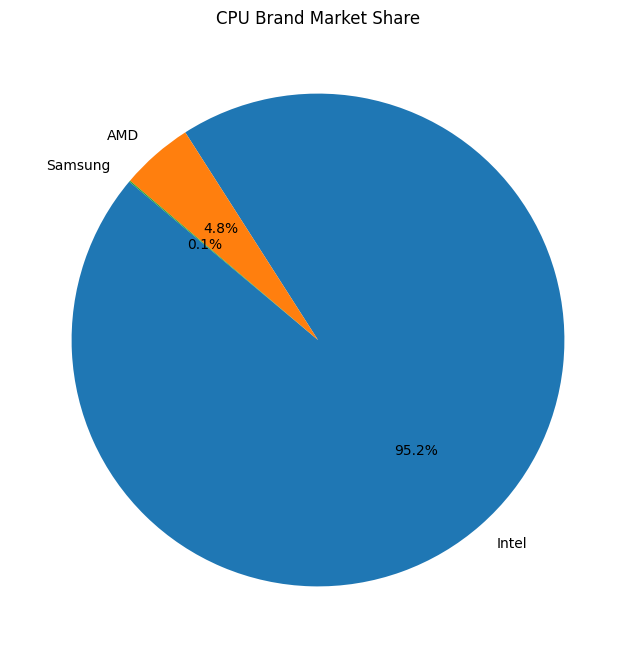

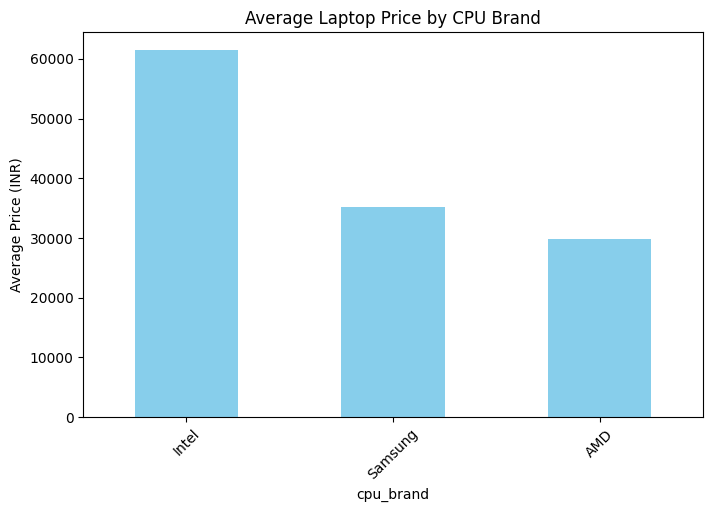

In [28]:
# Standardize column names once
df.columns = df.columns.str.strip().str.lower()

# Now you can use consistent lowercase column names
df["cpu_brand"] = df["cpu"].str.split().str[0]  # First word as brand
cpu_share = df["cpu_brand"].value_counts()
avg_price_cpu = df.groupby("cpu_brand")["price"].mean().sort_values(ascending=False)

# Market share pie chart
plt.figure(figsize=(8,8))
plt.pie(cpu_share, labels=cpu_share.index, autopct='%1.1f%%', startangle=140)
plt.title("CPU Brand Market Share")
plt.show()

# Bar chart for average price by CPU brand
plt.figure(figsize=(8,5))
avg_price_cpu.plot(kind="bar", color="skyblue")
plt.title("Average Laptop Price by CPU Brand")
plt.ylabel("Average Price (INR)")
plt.xticks(rotation=45)
plt.show()


In [30]:
# Use lowercase column names consistently
top5_laptops = df.sort_values(by="price", ascending=False).head(5)

print("\nTop 5 Most Expensive Laptops:\n",
      top5_laptops[["company", "typename", "cpu", "gpu", "ram", "screenresolution", "price"]])

# Ensure CPU_Brand exists
if "cpu_brand" not in df.columns:
    df["cpu_brand"] = df["cpu"].str.split().str[0]

# Find common features
common_type = top5_laptops["typename"].mode()[0]
common_cpu_brand = top5_laptops["cpu_brand"].mode()[0]
common_ram = top5_laptops["ram"].mode()[0]

print(f"\nCommon Features among Top 5:")
print(f"- Type: {common_type}")
print(f"- CPU Brand: {common_cpu_brand}")
print(f"- RAM: {common_ram} GB")



Top 5 Most Expensive Laptops:
      company     typename                            cpu  \
196    Razer       Gaming    Intel Core i7 7820HK 2.9GHz   
830    Razer       Gaming    Intel Core i7 7820HK 2.9GHz   
610   Lenovo     Notebook  Intel Xeon E3-1535M v6 3.1GHz   
749       HP  Workstation  Intel Xeon E3-1535M v5 2.9GHz   
1066    Asus       Gaming    Intel Core i7 6820HK 2.7GHz   

                          gpu  ram                     screenresolution  \
196   Nvidia GeForce GTX 1080   32  4K Ultra HD / Touchscreen 3840x2160   
830   Nvidia GeForce GTX 1080   32  4K Ultra HD / Touchscreen 3840x2160   
610      Nvidia Quadro M2200M   32      IPS Panel 4K Ultra HD 3840x2160   
749      Nvidia Quadro M2000M   16          IPS Panel Full HD 1920x1080   
1066  Nvidia GeForce GTX 980    64          IPS Panel Full HD 1920x1080   

          price  
196   324954.72  
830   292986.72  
610   261018.72  
749   233845.92  
1066  211788.00  

Common Features among Top 5:
- Type: Gaming
- C


Numeric correlations:
 price        1.000000
ram_gb       0.743007
weight_kg    0.210370
inches       0.068197
Name: price, dtype: float64


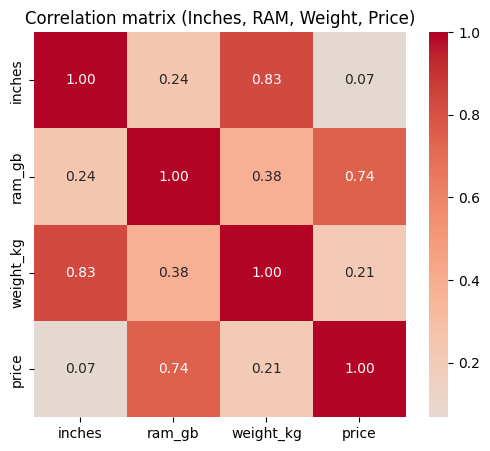


Interpretation (correlation):
 - Look at correlation values above. Correlation close to +1 means strong positive relationship with price; negative values mean inverse relationship.

Price by screen quality:
                 count           mean       median           std
screen_quality                                                 
4K                 43  129191.435833  119916.2304  56695.432071
2K                 79   94856.805205   95850.7200  30034.309748
Full HD           846   64950.715081   58554.7200  32663.174574
HD                335   29890.870453   26053.9200  14764.692879


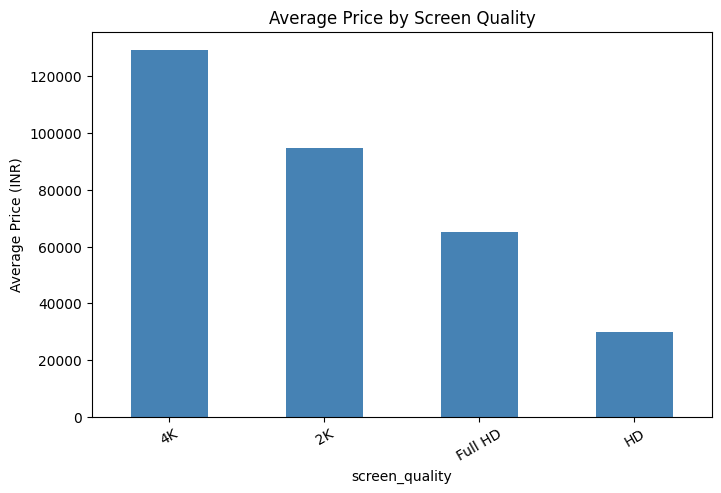

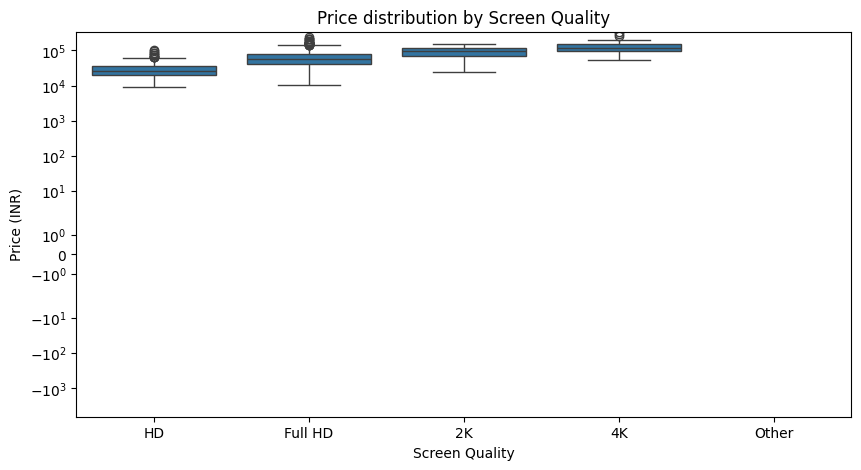


Gaming laptops mean price: ₹67522.24 (n=573)
Non-gaming laptops mean price: ₹53863.59 (n=730)


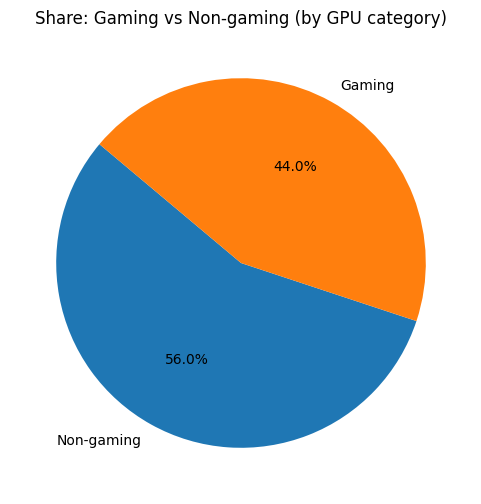

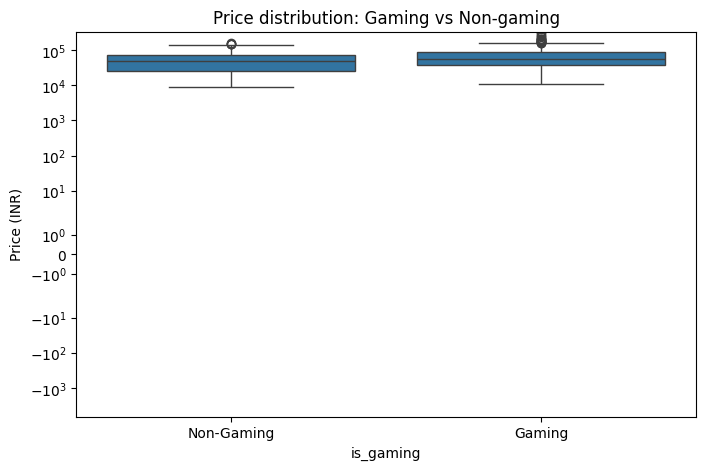


Light laptops (n=314): mean price = ₹71505.78
Heavy laptops (n=989): mean price = ₹56175.79

T-test (light vs heavy): t = 6.843, p = 0.0000
=> Reject H0: Significant difference in mean price between light and heavy laptops (p < 0.05).
Cohen's d = 0.418 (effect size)

Top 10 models by performance-to-price ratio:
company typename                                  cpu                    gpu  ram_gb  ssd_gb      price  perf_score  perf_to_price
   Asus Notebook          AMD E-Series E2-6110 1.5GHz          AMD Radeon R2       2     0.0 10602.7200      6.2500       0.000589
     HP Notebook         AMD E-Series E2-9000e 1.5GHz          AMD Radeon R2       4     0.0 13746.2400      6.5000       0.000473
   Acer  Netbook Intel Celeron Dual Core 3205U 1.5GHz      Intel HD Graphics       2    32.0  9270.7200      4.3750       0.000472
   Asus Notebook             AMD E-Series 6110 1.5GHz          AMD Radeon R2       4    64.0 14811.3072      6.7500       0.000456
   Vero Notebook          Intel

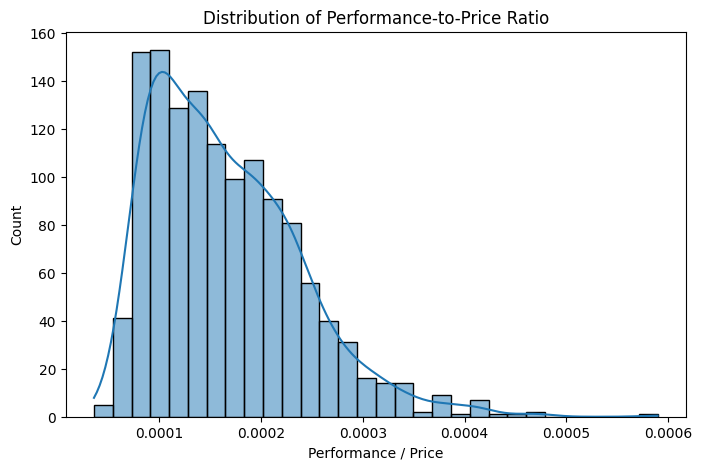

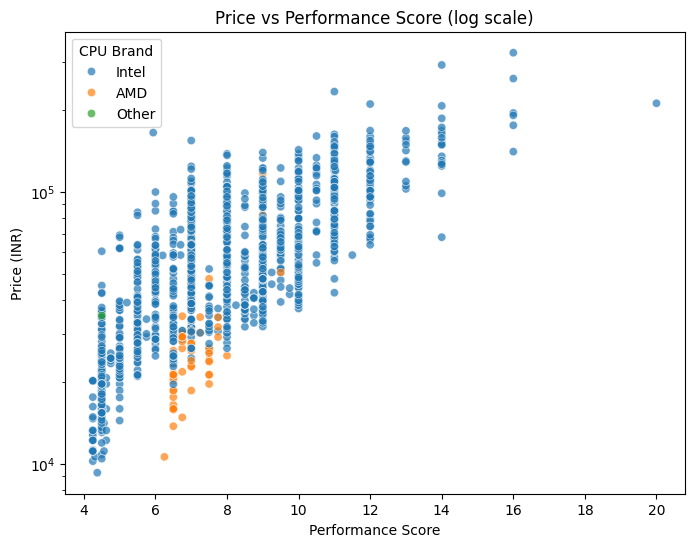


Saved CSV summaries: screen_price_summary.csv, top_perf_models.csv, top_combinations.csv
Done. Inspect the charts and tables to draw conclusions.


In [31]:
# advanced_laptop_analysis.py
import re
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# -------------------------
# Helper functions
# -------------------------
def standardize_cols(df):
    # make lowercase, strip, replace spaces/special chars with underscore
    df = df.copy()
    df.columns = (df.columns
                  .str.strip()
                  .str.lower()
                  .str.replace(r'\s+', '_', regex=True)
                  .str.replace(r'[^0-9a-zA-Z_]', '_', regex=True))
    return df

def parse_price(x):
    if pd.isna(x): return np.nan
    s = str(x)
    s = s.replace(',', '')
    try:
        return float(s)
    except:
        return np.nan

def parse_ram(x):
    if pd.isna(x): return np.nan
    m = re.search(r'(\d+)', str(x))
    return int(m.group(1)) if m else np.nan

def parse_weight(x):
    if pd.isna(x): return np.nan
    s = str(x).lower().replace('kgs','kg')
    m = re.search(r'(\d+\.?\d*)', s)
    return float(m.group(1)) if m else np.nan

def extract_resolution(res):
    # returns (x_res, y_res)
    if pd.isna(res): return (np.nan, np.nan)
    s = str(res)
    m = re.search(r'(\d{3,4})\s*[x×]\s*(\d{3,4})', s)
    if m:
        return int(m.group(1)), int(m.group(2))
    else:
        # sometimes resolution like "FHD" or "4K" may appear; try mapping:
        if re.search(r'4k|2160', s, flags=re.I):
            return 3840, 2160
        if re.search(r'2k|1440', s, flags=re.I):
            return 2560, 1440
        if re.search(r'fhd|full', s, flags=re.I):
            return 1920, 1080
        if re.search(r'hd|720', s, flags=re.I):
            return 1366, 768
    return (np.nan, np.nan)

def screen_quality_category(x_res, y_res):
    # Categorize based on resolution
    if pd.isna(x_res) or pd.isna(y_res):
        return 'Unknown'
    # Use highest dimension to decide
    if x_res >= 3840 or y_res >= 2160:
        return '4K'
    elif x_res >= 2560 or y_res >= 1440:
        return '2K'
    elif x_res >= 1920 or y_res >= 1080:
        return 'Full HD'
    elif x_res >= 1280 or y_res >= 720:
        return 'HD'
    else:
        return 'Other'

def gpu_type(gpu_str):
    if pd.isna(gpu_str): return 'Unknown'
    s = str(gpu_str).lower()
    # Dedicated GPUs keywords
    if any(k in s for k in ['nvidia', 'geforce', 'gtx', 'rtx', 'quadro', 'radeon', 'rx', 'vga']):
        return 'Dedicated'
    # Apple discrete GPUs may be 'apple', but many apple devices use integrated apple gpu, handle separately
    if 'intel' in s or 'uhd' in s or 'iris' in s or 'integrated' in s or 'apple' in s and 'm' in s:
        return 'Integrated'
    return 'Other'

def cpu_brand(cpu_str):
    if pd.isna(cpu_str): return 'Other'
    s = str(cpu_str).lower()
    if 'intel' in s:
        return 'Intel'
    if 'amd' in s:
        return 'AMD'
    if 'apple' in s or re.search(r'\bm[12]\b', s):
        return 'Apple'
    return 'Other'

# Simple CPU score from name
def cpu_score(cpu_str):
    if pd.isna(cpu_str): return 1.0
    s = str(cpu_str).lower()
    # high -> medium -> low
    if re.search(r'i9|ryzen\s*9|m[2-9]', s):
        return 3.0
    if re.search(r'i7|ryzen\s*7', s):
        return 2.0
    if re.search(r'i5|ryzen\s*5', s):
        return 1.5
    if re.search(r'i3|ryzen\s*3', s):
        return 1.0
    return 1.0

# GPU score heuristic
def gpu_score(gpu_str):
    if pd.isna(gpu_str): return 1.0
    s = str(gpu_str).lower()
    if re.search(r'rtx|quadro|rx\s?7|rx\s?6|radeon\s?pro|vega|titan', s):
        return 3.0
    if re.search(r'gtx|geforce|radeon|rx', s):
        return 2.0
    if re.search(r'intel|iris|uhd', s):
        return 1.0
    return 1.0

# -------------------------
# Load & clean
# -------------------------
df = pd.read_csv("laptop_data.csv")
df = standardize_cols(df)

# parse price, ram, weight, resolution
df['price'] = df['price'].apply(parse_price)
# detect ram column name (ram or something else)
ram_col = None
for c in df.columns:
    if c.lower() == 'ram' or 'ram' in c.lower():
        ram_col = c
        break
if ram_col is None:
    raise KeyError("RAM column not found. Check column names: ", df.columns)
df['ram_gb'] = df[ram_col].apply(parse_ram)

# Weight parsing
weight_col = next((c for c in df.columns if 'weight' in c), None)
if weight_col is None:
    df['weight_kg'] = np.nan
else:
    df['weight_kg'] = df[weight_col].apply(parse_weight)

# Screen resolution
sr_col = next((c for c in df.columns if 'screen' in c and ('res' in c or 'reso' in c or 'resolution' in c)), None)
if sr_col is None:
    # try any column name with 'screen' or 'resolution'
    sr_col = next((c for c in df.columns if 'screen' in c or 'resolution' in c), None)

df['x_res'], df['y_res'] = zip(*df[sr_col].fillna('').apply(extract_resolution))
df['screen_quality'] = df.apply(lambda r: screen_quality_category(r['x_res'], r['y_res']), axis=1)

# CPU & GPU
cpu_col = next((c for c in df.columns if 'cpu' in c), None)
gpu_col = next((c for c in df.columns if 'gpu' in c or 'graphic' in c), None)

df['cpu_brand'] = df[cpu_col].apply(cpu_brand) if cpu_col else 'Other'
df['gpu_raw'] = df[gpu_col] if gpu_col else np.nan
df['gpu_category'] = df['gpu_raw'].apply(gpu_type)

# Extract SSD/HDD if memory column exists (simple parsing)
mem_col = next((c for c in df.columns if 'memory' in c or 'storage' in c), None)
def parse_storage(mem):
    if pd.isna(mem):
        return (0.0, 0.0, 0.0)
    s = str(mem).lower()
    parts = [p.strip() for p in s.split('+')]
    ssd = 0.0
    hdd = 0.0
    other = 0.0
    for p in parts:
        m = re.search(r'(\d+\.?\d*)\s*(tb|gb)', p)
        if not m:
            continue
        val = float(m.group(1))
        if m.group(2).lower() == 'tb':
            val *= 1024.0
        if 'ssd' in p or 'nvme' in p or 'sata' in p and 'ssd' in p:
            ssd += val
        elif 'hdd' in p:
            hdd += val
        else:
            # ambiguous treat as other
            other += val
    total = ssd + hdd + other
    return ssd, hdd, total

if mem_col:
    df['ssd_gb'], df['hdd_gb'], df['total_mem_gb'] = zip(*df[mem_col].fillna('').apply(parse_storage))
else:
    df['ssd_gb'] = 0.0; df['hdd_gb'] = 0.0; df['total_mem_gb'] = 0.0

# Drop rows without price
df = df[df['price'].notna()].copy()

# ---------------------------------------
# 1) Correlation analysis (Inches, RAM, Weight, Price)
# ---------------------------------------
num_df = pd.DataFrame({
    'inches': df[[c for c in df.columns if 'inch' in c]].iloc[:,0] if any('inch' in c for c in df.columns) else df.get('inches', pd.Series(np.nan)),
    'ram_gb': df['ram_gb'],
    'weight_kg': df['weight_kg'],
    'price': df['price']
}).astype(float)

# some datasets may have 'inches' column already - handle both
if 'inches' not in num_df.columns or num_df['inches'].isnull().all():
    # try any column with 'inch'
    inch_col = next((c for c in df.columns if 'inch' in c), None)
    if inch_col:
        num_df['inches'] = pd.to_numeric(df[inch_col], errors='coerce')

corr = num_df.corr()
print("\nNumeric correlations:\n", corr['price'].sort_values(ascending=False))

# Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title("Correlation matrix (Inches, RAM, Weight, Price)")
plt.show()

# Interpretation printed
print("\nInterpretation (correlation):")
for feature in ['ram_gb','ssdg_b' if 'ssdg_b' in num_df.columns else 'ram_gb','inches','weight_kg']:
    pass
print(" - Look at correlation values above. Correlation close to +1 means strong positive relationship with price; negative values mean inverse relationship.")

# ---------------------------------------
# 2) Screen quality categories (HD, Full HD, 2K, 4K) -> price comparison
# ---------------------------------------
# Some rows might have Unknown; keep them but focus on known categories
screen_price = df.groupby('screen_quality')['price'].agg(['count','mean','median','std']).sort_values(by='mean', ascending=False)
print("\nPrice by screen quality:\n", screen_price)

# Bar + boxplot
plt.figure(figsize=(8,5))
screen_price['mean'].plot(kind='bar', color='steelblue')
plt.ylabel('Average Price (INR)')
plt.title('Average Price by Screen Quality')
plt.xticks(rotation=30)
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='screen_quality', y='price', data=df[df['screen_quality']!='Unknown'], order=['HD','Full HD','2K','4K','Other'])
plt.yscale('symlog')  # use symlog if price spread is large, comment out if undesired
plt.title('Price distribution by Screen Quality')
plt.xlabel('Screen Quality')
plt.ylabel('Price (INR)')
plt.show()

# ---------------------------------------
# 3) Gaming vs Non-Gaming (dedicated vs integrated GPU)
# ---------------------------------------
df['is_gaming'] = df['gpu_category'] == 'Dedicated'
gaming_prices = df[df['is_gaming']==True]['price']
non_gaming_prices = df[df['is_gaming']==False]['price']

print("\nGaming laptops mean price: ₹{:.2f} (n={})".format(gaming_prices.mean(), gaming_prices.count()))
print("Non-gaming laptops mean price: ₹{:.2f} (n={})".format(non_gaming_prices.mean(), non_gaming_prices.count()))

# Pie chart for share
plt.figure(figsize=(6,6))
counts = df['is_gaming'].value_counts()
plt.pie(counts, labels=['Gaming' if x else 'Non-gaming' for x in counts.index], autopct='%1.1f%%', startangle=140)
plt.title('Share: Gaming vs Non-gaming (by GPU category)')
plt.show()

# Boxplots compare
plt.figure(figsize=(8,5))
sns.boxplot(x='is_gaming', y='price', data=df)
plt.xticks([0,1], ['Non-Gaming','Gaming'])
plt.yscale('symlog')
plt.title('Price distribution: Gaming vs Non-gaming')
plt.ylabel('Price (INR)')
plt.show()

# ---------------------------------------
# 4) Lightweight (<1.5kg) vs heavier: hypothesis test
# ---------------------------------------
light_mask = df['weight_kg'] < 1.5
light_prices = df[light_mask]['price'].dropna()
heavy_prices = df[~light_mask]['price'].dropna()

print("\nLight laptops (n={}): mean price = ₹{:.2f}".format(len(light_prices), light_prices.mean()))
print("Heavy laptops (n={}): mean price = ₹{:.2f}".format(len(heavy_prices), heavy_prices.mean()))

# Check sizes
if len(light_prices) < 3 or len(heavy_prices) < 3:
    print("Not enough samples to perform a robust t-test.")
else:
    # t-test (unequal variance)
    tstat, pval = stats.ttest_ind(light_prices, heavy_prices, equal_var=False, nan_policy='omit')
    # Cohen's d
    def cohens_d(x, y):
        nx, ny = len(x), len(y)
        dof = nx + ny - 2
        pooled_sd = np.sqrt(((nx - 1)*np.std(x, ddof=1)**2 + (ny - 1)*np.std(y, ddof=1)**2) / dof)
        return (np.mean(x) - np.mean(y)) / pooled_sd if pooled_sd > 0 else np.nan
    d = cohens_d(light_prices, heavy_prices)
    print("\nT-test (light vs heavy): t = {:.3f}, p = {:.4f}".format(tstat, pval))
    alpha = 0.05
    if pval < alpha:
        print("=> Reject H0: Significant difference in mean price between light and heavy laptops (p < {}).".format(alpha))
    else:
        print("=> Fail to reject H0: No significant difference detected (p >= {}).".format(alpha))
    print("Cohen's d = {:.3f} (effect size)".format(d))

# ---------------------------------------
# 5) Performance-to-price ratio and best combos
# ---------------------------------------
# Create performance score: combine cpu_score, gpu_score, ram, ssd
df['cpu_score'] = df[cpu_col].apply(cpu_score) if cpu_col else 1.0
df['gpu_score'] = df['gpu_raw'].apply(gpu_score)
# normalize RAM and SSD to comparable scale
df['ram_factor'] = df['ram_gb'] / 8.0  # example: 8GB -> 1.0
df['ssd_factor'] = df['ssd_gb'] / 256.0  # 256GB -> 1.0

# performance score (tunable weights)
df['perf_score'] = (2.0 * df['cpu_score']) + (2.0 * df['gpu_score']) + df['ram_factor'] + df['ssd_factor']

# avoid division by zero
df['perf_to_price'] = df['perf_score'] / (df['price'] + 1e-6)

# Top combos by perf_to_price
top_perf = df.sort_values(by='perf_to_price', ascending=False).head(20)
print("\nTop 10 models by performance-to-price ratio:")
cols_show = [c for c in ['company','typename', cpu_col, gpu_col, 'ram_gb', 'ssd_gb', 'price', 'perf_score', 'perf_to_price'] if c in df.columns or c==cpu_col]
print(top_perf[['company','typename', cpu_col, gpu_col, 'ram_gb','ssd_gb','price','perf_score','perf_to_price']].head(10).to_string(index=False))

# Aggregate best combinations (CPU+GPU+RAM)
top_comb = (df.assign(cpu_simple = df[cpu_col].str.split().str[0].fillna('Other'),
                      gpu_simple = df[gpu_col].str.split().str[0].fillna('Other') if gpu_col else 'Other')
            .groupby(['cpu_simple','gpu_simple','ram_gb'])
            .agg(avg_perf_to_price = ('perf_to_price','mean'),
                 count = ('perf_to_price','size'),
                 avg_price = ('price','mean'),
                 avg_perf = ('perf_score','mean'))
            .reset_index()
            .sort_values('avg_perf_to_price', ascending=False))
print("\nTop CPU+GPU+RAM combos by average perf_to_price (top 10):")
print(top_comb.head(10).to_string(index=False))

# Visualization: performance to price histogram and scatter price vs perf_score
plt.figure(figsize=(8,5))
sns.histplot(df['perf_to_price'].dropna(), bins=30, kde=True)
plt.title('Distribution of Performance-to-Price Ratio')
plt.xlabel('Performance / Price')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x='perf_score', y='price', data=df, hue='cpu_brand', alpha=0.7)
plt.yscale('log')
plt.title('Price vs Performance Score (log scale)')
plt.xlabel('Performance Score')
plt.ylabel('Price (INR)')
plt.legend(title='CPU Brand')
plt.show()

# Save summary tables to CSV for convenience
screen_price.to_csv('screen_price_summary.csv')
top_perf.head(50).to_csv('top_perf_models.csv')
top_comb.head(50).to_csv('top_combinations.csv')

print("\nSaved CSV summaries: screen_price_summary.csv, top_perf_models.csv, top_combinations.csv")
print("Done. Inspect the charts and tables to draw conclusions.")


In [4]:
import pandas as pd
df = pd.read_csv("/content/laptop_data.csv")


Columns in dataset: ['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price']


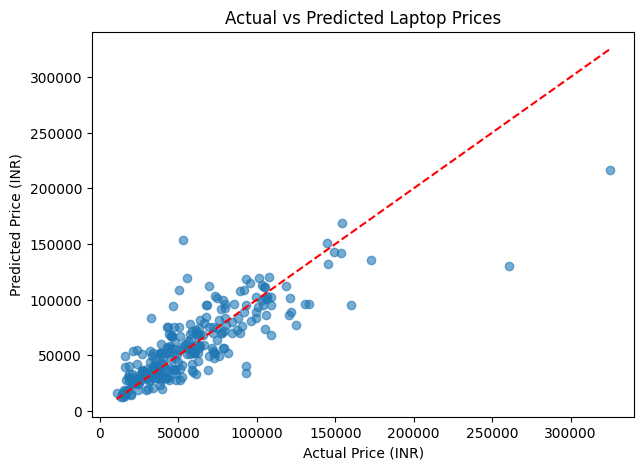

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import re

# Load your dataset
df = pd.read_csv("/content/laptop_data.csv")

# Check columns
print("Columns in dataset:", df.columns.tolist())

# Extract numeric values safely
if 'RAM' in df.columns:
    df['RAM_GB'] = df['RAM'].astype(str).str.extract(r'(\d+)').astype(float)
else:
    df['RAM_GB'] = np.nan

if 'Memory' in df.columns:
    df['Memory_GB'] = df['Memory'].astype(str).str.extract(r'(\d+)').astype(float)
else:
    df['Memory_GB'] = np.nan

if 'ScreenResolution' in df.columns:
    df['Pixels'] = df['ScreenResolution'].astype(str).str.extract(r'(\d+)[xX](\d+)').astype(float).prod(axis=1)
else:
    df['Pixels'] = np.nan

if 'Inches' in df.columns:
    df['Inches'] = pd.to_numeric(df['Inches'], errors='coerce')
else:
    df['Inches'] = np.nan

# Price column
if 'Price' in df.columns:
    df['Price_INR'] = pd.to_numeric(df['Price'], errors='coerce')
else:
    raise ValueError("No Price column found in dataset.")

# Features that exist in the dataset
possible_features = ['RAM_GB', 'Memory_GB', 'Pixels', 'Inches', 'CPU', 'GPU', 'Company', 'OpSys', 'TypeName']
features = [f for f in possible_features if f in df.columns]

X = df[features].copy()
y = df['Price_INR']

# Encode categorical
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Fill NaNs
X = X.fillna(0)
y = y.fillna(y.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=150, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Scatter plot
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Price (INR)")
plt.ylabel("Predicted Price (INR)")
plt.title("Actual vs Predicted Laptop Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


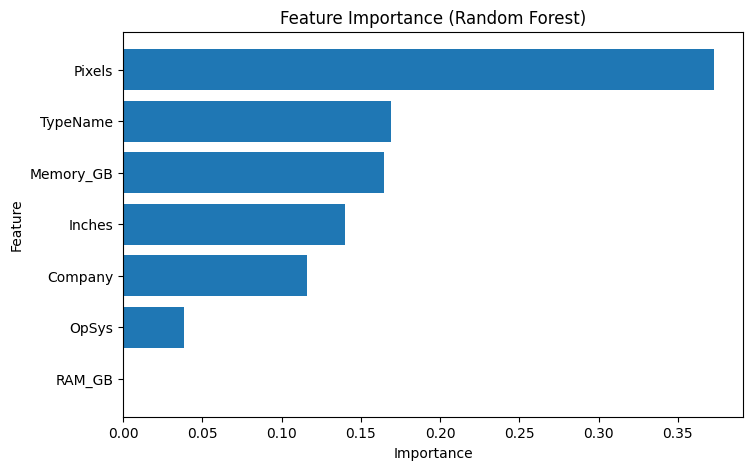

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

importances = model.feature_importances_
imp_df = pd.DataFrame({'feature': X.columns, 'importance': importances})
imp_df = imp_df.sort_values('importance', ascending=False)

plt.figure(figsize=(8,5))
plt.barh(imp_df['feature'], imp_df['importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()


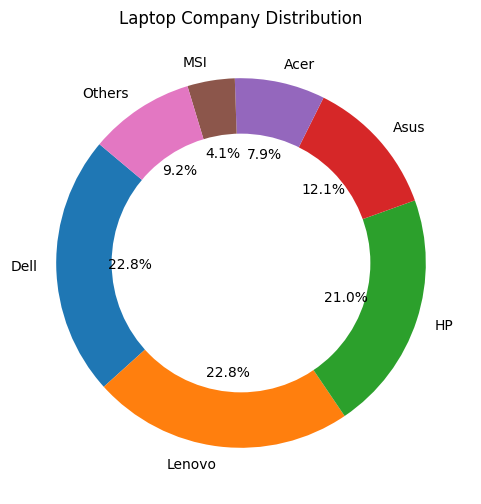

In [11]:
company_counts = df['Company'].value_counts()
top_companies = company_counts.head(6)
other_sum = company_counts.iloc[6:].sum()
top_companies['Others'] = other_sum

plt.figure(figsize=(6,6))
plt.pie(top_companies, labels=top_companies.index, autopct='%1.1f%%', startangle=140)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Laptop Company Distribution")
plt.show()
